In [16]:
# Step 1: Import libraries
import pandas as pd
import mysql.connector

# Step 2: Load CSV dataset
df = pd.read_csv("../data/myntra_sales.csv")

# Preview dataset
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head(5)

# Step 3: Convert numeric columns to native Python types
df['price'] = df['price'].astype(float)
df['MRP'] = df['MRP'].astype(float)
df['discount_percent'] = df['discount_percent'].astype(float)
df['ratings'] = df['ratings'].astype(float)
df['number_of_ratings'] = df['number_of_ratings'].astype(int)

# Step 4: Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",               # or 'ecom_user' if you created a separate user
    password="YourRootPassword",  # replace with your MySQL password
    database="myntra"
)
cursor = conn.cursor()

# Step 5: Create table 'sales' if it doesn't exist
create_table_query = """
CREATE TABLE IF NOT EXISTS sales (
    id INT AUTO_INCREMENT PRIMARY KEY,
    brand_name VARCHAR(100),
    pants_description VARCHAR(255),
    price DECIMAL(10,2),
    MRP DECIMAL(10,2),
    discount_percent DECIMAL(5,2),
    ratings DECIMAL(3,2),
    number_of_ratings INT
);
"""
cursor.execute(create_table_query)

# Step 6: Insert CSV rows into MySQL table
for row in df.itertuples(index=False):
    cursor.execute("""
        INSERT INTO sales 
        (brand_name, pants_description, price, MRP, discount_percent, ratings, number_of_ratings)
        VALUES (%s, %s, %s, %s, %s, %s, %s)
    """, tuple(row))

# Step 7: Commit and close connection
conn.commit()
cursor.close()
conn.close()

print("Data loaded successfully into MySQL!")


Shape: (52120, 7)
Columns: ['brand_name', 'pants_description', 'price', 'MRP', 'discount_percent', 'ratings', 'number_of_ratings']
Data loaded successfully into MySQL!


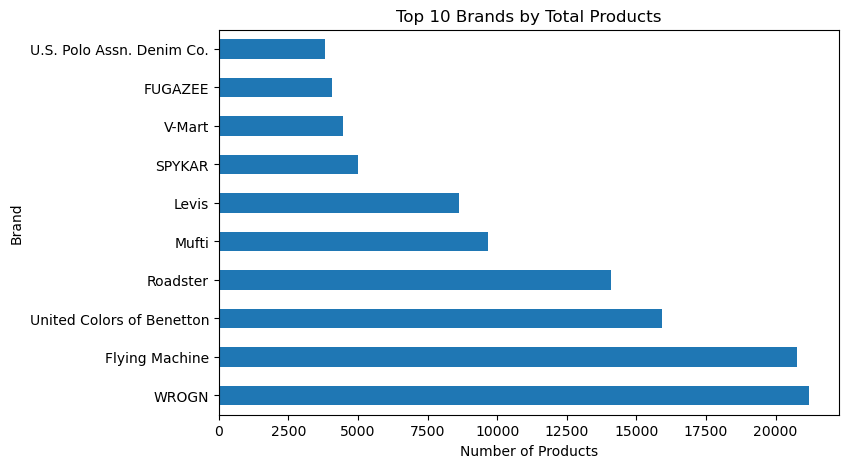

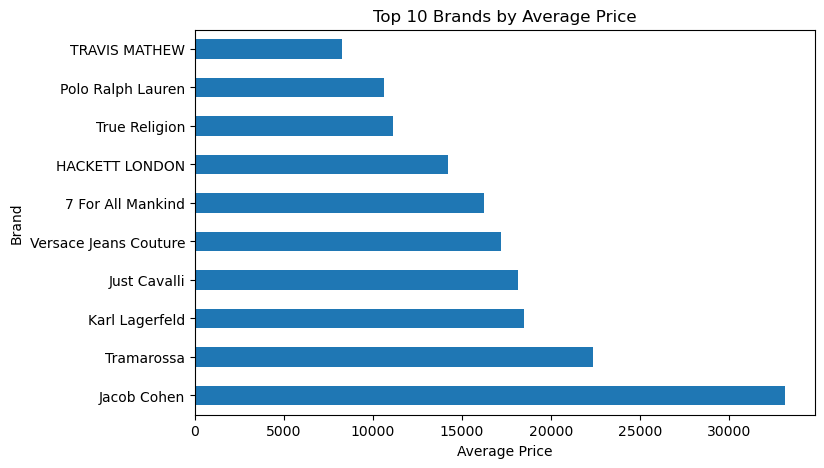

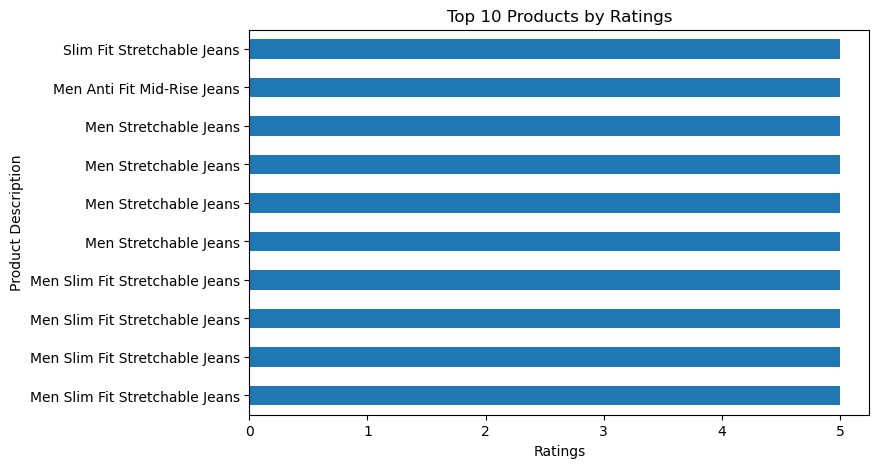

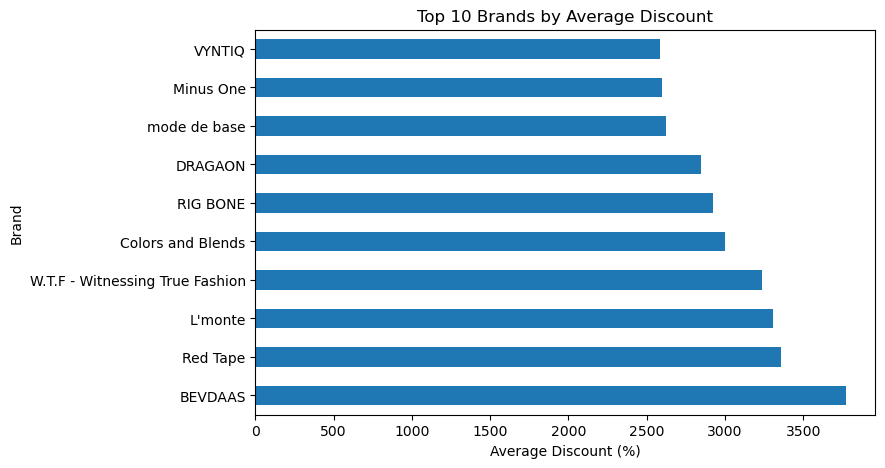

In [22]:
import matplotlib.pyplot as plt

# 1. Top 10 Brands by Total Products
df_total_products.sort_values("total_products", ascending=False).head(10)\
    .plot(kind="barh", x="brand_name", y="total_products", legend=False, figsize=(8,5))
plt.title("Top 10 Brands by Total Products")
plt.xlabel("Number of Products")
plt.ylabel("Brand")
plt.show()

# 2. Top 10 Brands by Average Price
df_avg_price.sort_values("avg_price", ascending=False).head(10)\
    .plot(kind="barh", x="brand_name", y="avg_price", legend=False, figsize=(8,5))
plt.title("Top 10 Brands by Average Price")
plt.xlabel("Average Price")
plt.ylabel("Brand")
plt.show()

# 3. Top 10 Products by Ratings
df_top_rated.plot(kind="barh", x="pants_description", y="ratings", legend=False, figsize=(8,5))
plt.title("Top 10 Products by Ratings")
plt.xlabel("Ratings")
plt.ylabel("Product Description")
plt.show()

# 4. Top 10 Brands by Average Discount
df_avg_discount.sort_values("avg_discount_percent", ascending=False).head(10)\
    .plot(kind="barh", x="brand_name", y="avg_discount_percent", legend=False, figsize=(8,5))
plt.title("Top 10 Brands by Average Discount")
plt.xlabel("Average Discount (%)")
plt.ylabel("Brand")
plt.show()


Project: Analysis of Myntra Sales Data

1. Introduction

In this project, we analyzed Myntra’s sales dataset to understand brand performance, pricing, ratings, and discounts.
The data was stored in a MySQL database and then queried using SQL.
Finally, we used Python (Pandas + Matplotlib) to visualize the results.

2. Dataset Overview

Total rows: 52,120

Columns:

brand_name → name of the brand

pants_description → product details

price → selling price

MRP → original price

discount_percent → discount applied

ratings → average customer rating

number_of_ratings → number of customers who rated

3. SQL Queries Performed

We wrote SQL queries to find:

Total products per brand → to see which brands dominate the catalog.

Average price per brand → to understand pricing trends.

Top 10 products by ratings → to highlight the best-rated products.

Average discount per brand → to check which brands give the highest offers.

4. Insights from Analysis

 Top brands by number of products → WROGN, Flying Machine, UCB, Roadster lead the platform.

 High-priced brands → Jacob Cohen, Tramarossa, Karl Lagerfeld dominate premium pricing.

 Top products by ratings → Pepe Jeans and Thomas Scott products are loved by customers.

 Brands with highest discounts → BEVDAAS, Red Tape, and L’monte offer the biggest deals.

5. Visualizations

We created bar charts to make insights clear:

Top 10 Brands by Products

Top 10 Brands by Average Price

Top 10 Products by Ratings

Top 10 Brands by Discounts

6. Conclusion

This project shows how to:

Load raw CSV into MySQL

Use SQL queries for business insights

Use Python for visualization

Communicate results in a simple and clear way